In [1]:
import pandas as pd
import numpy as np
import joblib

In [2]:
data = pd.read_excel("customer_churn_large_dataset.xlsx")
data.head()

KeyboardInterrupt: 

In [ ]:
# Data Exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
# Check for missing values
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
# Check for outliers
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [ ]:
# drop unrequired columns
data = data.drop(columns=['CustomerID', 'Name'])

## 1. Data Preprocessing

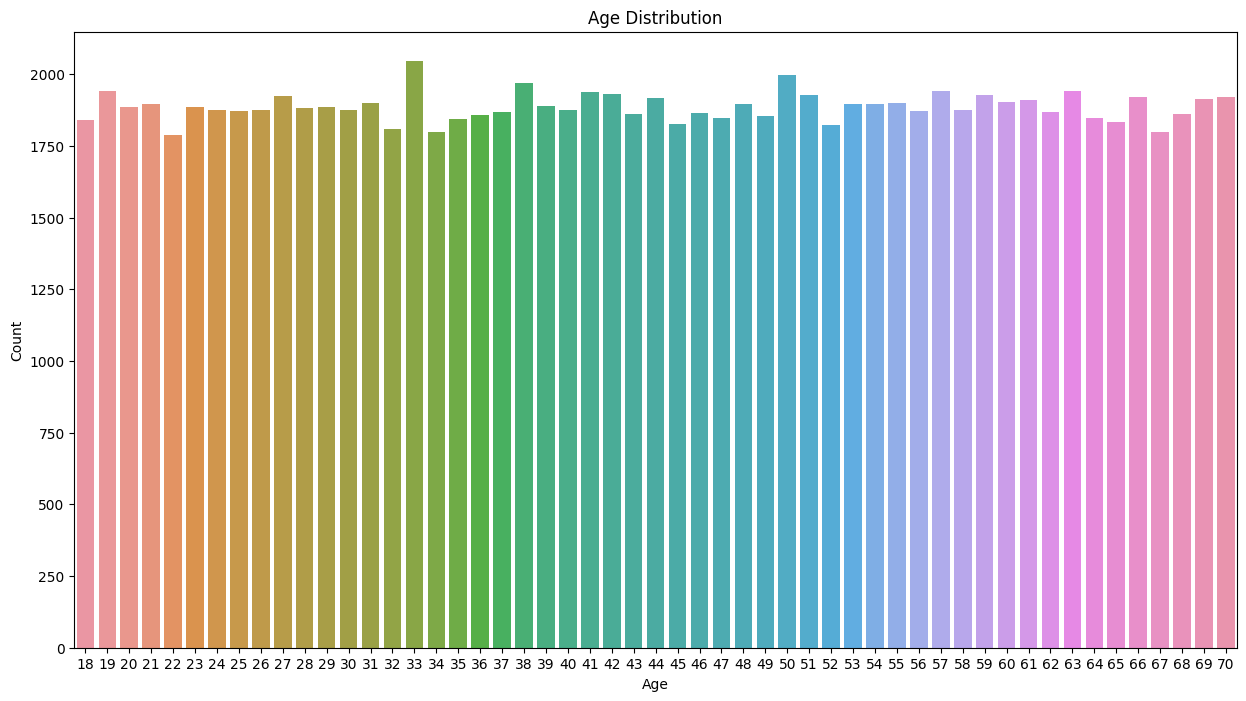

In [ ]:
# age distribution

import matplotlib.pyplot as plt
import seaborn as sns

ages = list(set(data.Age))
count = []
for age in ages:
    count.append(len(data[data.Age == age]))
plt.figure(figsize=(15, 8))
sns.barplot(x=ages, y=count)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

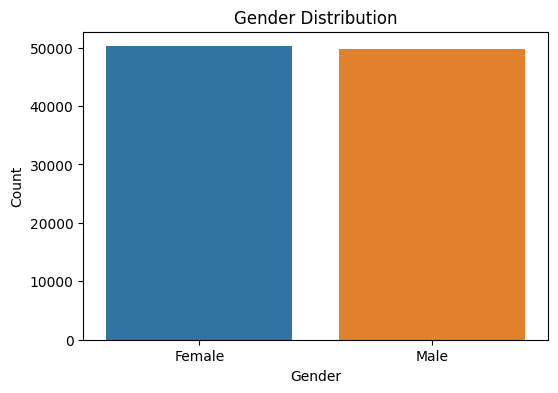

In [ ]:
# Gender Distribution

gender = list(set(data.Gender))
count = []
for gen in gender:
    count.append(len(data[data.Gender == gen]))
plt.figure(figsize=(6, 4))
sns.barplot(x=gender, y=count)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

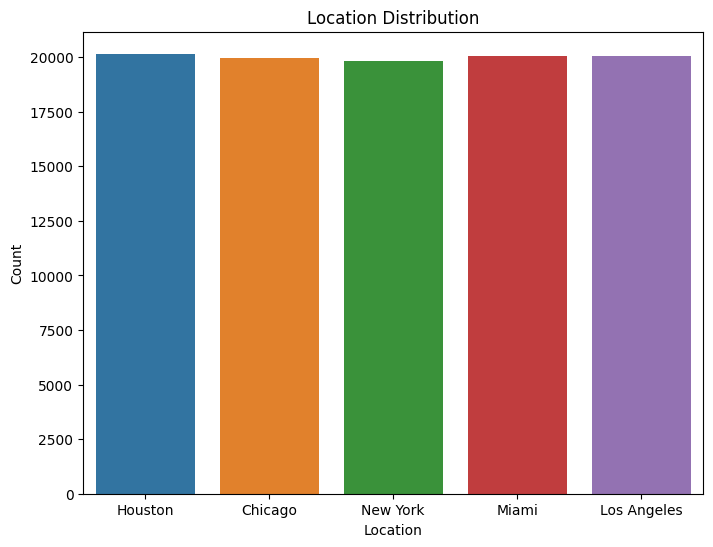

In [ ]:
# Location Distribution

location = list(set(data.Location))
count = []
for loc in location:
    count.append(len(data[data.Location == loc]))
plt.figure(figsize=(8, 6))
sns.barplot(x=location, y=count)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Distribution')
plt.show()

c:\Users\ramch\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


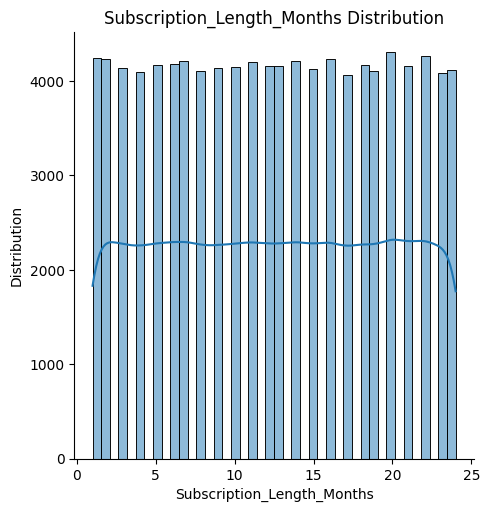

In [ ]:
# Subscription_Length_Months distribution

sns.displot(data['Subscription_Length_Months'], kde=True)
plt.xlabel('Subscription_Length_Months')
plt.ylabel('Distribution')
plt.title('Subscription_Length_Months Distribution')
plt.show()

c:\Users\ramch\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


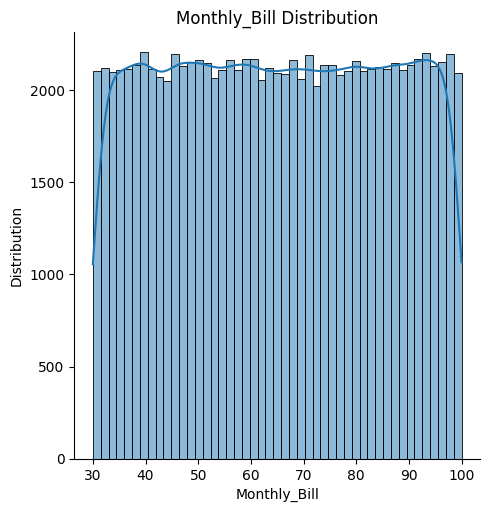

In [ ]:
# Monthly_Bill Distribution

sns.displot(data['Monthly_Bill'], kde=True)
plt.xlabel('Monthly_Bill')
plt.ylabel('Distribution')
plt.title('Monthly_Bill Distribution')
plt.show()

c:\Users\ramch\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


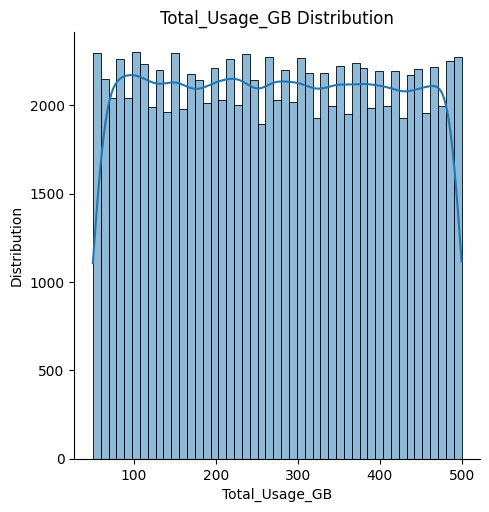

In [ ]:
# Total_Usage_GB

sns.displot(data['Total_Usage_GB'], kde=True)
plt.xlabel('Total_Usage_GB')
plt.ylabel('Distribution')
plt.title('Total_Usage_GB Distribution')
plt.show()

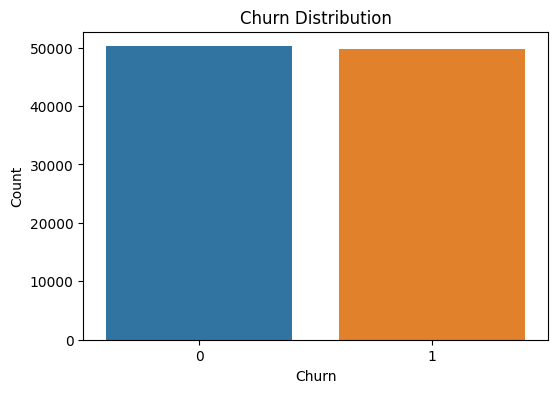

In [ ]:
# Churn Distribution

churn = list(set(data.Churn))
count = []
for chn in churn:
    count.append(len(data[data.Churn == chn]))
plt.figure(figsize=(6, 4))
sns.barplot(x=churn, y=count)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

In [ ]:
# Label Encoding of Catetgorical Variables

categorical_features = ['Gender', 'Location']
for feature in categorical_features:
    data[feature] = data[feature].astype('category')
    data[feature] = data[feature].cat.codes

In [ ]:
# Data Normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']] = scaler.fit_transform(
    data[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']])

## Feature Engineering

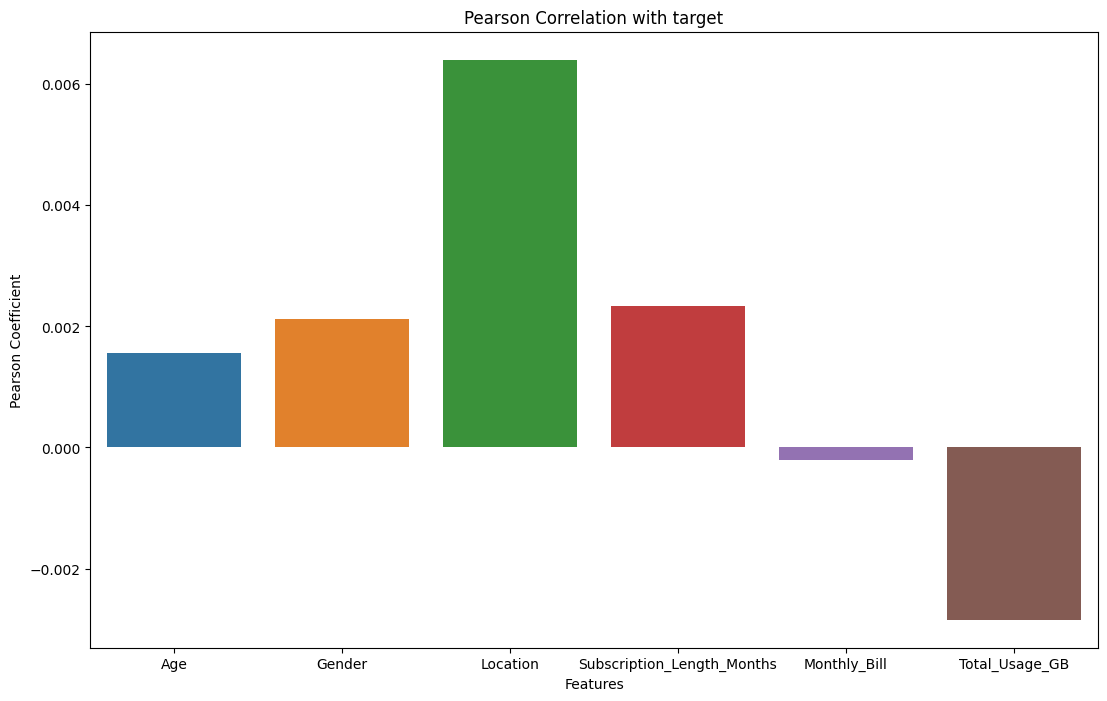

In [ ]:
# Pearson Correlation with target

from scipy.stats import pearsonr

features = list(data.columns)
features.remove('Churn')
p_coeff = []
for feature in features:
    p_coeff.append(pearsonr(data[feature], data['Churn'])[0])

plt.figure(figsize=(13, 8))
sns.barplot(x=features, y=p_coeff)
plt.xlabel('Features')
plt.ylabel('Pearson Coefficient')
plt.title('Pearson Correlation with target')
plt.show()

In [ ]:
# Splitting data into train and test

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data.drop(columns=['Churn']), data['Churn'], test_size=0.2, shuffle=True)

## 3. Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_X, train_y)

pred_y = lr.predict(test_X)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_acc = accuracy_score(test_y, pred_y)
lr_prec = precision_score(test_y, pred_y)
lr_rec = recall_score(test_y, pred_y)
lr_f1 = f1_score(test_y, pred_y)

print('Logistic Regression Accuracy: ', lr_acc)
print('Logistic Regression Precision: ', lr_prec)
print('Logistic Regression Recall: ', lr_rec)
print('Logistic Regression F1 Score: ', lr_f1)
joblib.dump(lr, 'Logistic_Regression.pkl')
# loaded_nb = joblib.load('Logistic_Regression.pkl')

Logistic Regression Accuracy:  0.49665
Logistic Regression Precision:  0.49345692475463465
Logistic Regression Recall:  0.27163581790895447
Logistic Regression F1 Score:  0.35039039814157574


['Logistic_Regression.pkl']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=35)
dt.fit(train_X, train_y)

pred_y = dt.predict(test_X)

dt_acc = accuracy_score(test_y, pred_y)
dt_prec = precision_score(test_y, pred_y)
dt_rec = recall_score(test_y, pred_y)
dt_f1 = f1_score(test_y, pred_y)

print("Decision Tree Accuracy: ", dt_acc)
print("Decision Tree Precision: ", dt_prec)
print("Decision Tree Recall: ", dt_rec)
print("Decision Tree F1 Score: ", dt_f1)
joblib.dump(dt, 'Decision_Tree.pkl')
# loaded_nb = joblib.load('Decision_Tree.pkl')

Decision Tree Accuracy:  0.50195
Decision Tree Precision:  0.5018295307791649
Decision Tree Recall:  0.4665332666333167
Decision Tree F1 Score:  0.4835381344947374


['Decision_Tree.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=30)
rf.fit(train_X, train_y)

pred_y = rf.predict(test_X)

rf_acc = accuracy_score(test_y, pred_y)
rf_prec = precision_score(test_y, pred_y)
rf_rec = recall_score(test_y, pred_y)
rf_f1 = f1_score(test_y, pred_y)

print('Random Forest Accuracy: ', rf_acc)
print('Random Forest Precision: ', rf_prec)
print('Random Forest Recall: ', rf_rec)
print('Random Forest F1 Score: ', rf_f1)
joblib.dump(rf, 'Random_Forest.pkl')
# loaded_nb = joblib.load('Random_Forest.pkl')

Random Forest Accuracy:  0.49835
Random Forest Precision:  0.49806399021805586
Random Forest Recall:  0.48904452226113054
Random Forest F1 Score:  0.49351304962390835


['Random_Forest.pkl']

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_X, train_y)

pred_y = nb.predict(test_X)

nb_acc = accuracy_score(test_y, pred_y)
nb_prec = precision_score(test_y, pred_y)
nb_rec = recall_score(test_y, pred_y)
nb_f1 = f1_score(test_y, pred_y)

print('Naive Bayes Accuracy: ', nb_acc)
print('Naive Bayes Precision: ', nb_prec)
print('Naive Bayes Recall: ', nb_rec)
print('Naive Bayes F1 Score: ', nb_f1)
joblib.dump(nb, 'Naive_Bayes.pkl')
# loaded_nb = joblib.load('Naive_Bayes.pkl')

Naive Bayes Accuracy:  0.49955
Naive Bayes Precision:  0.4987553342816501
Naive Bayes Recall:  0.28064032016008006
Naive Bayes F1 Score:  0.35917792432294


['Naive_Bayes.pkl']

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_X, train_y)

pred_y = svc.predict(test_X)

svc_acc = accuracy_score(test_y, pred_y)
svc_prec = precision_score(test_y, pred_y)
svc_rec = recall_score(test_y, pred_y)
svc_f1 = f1_score(test_y, pred_y)

print('SVC Accuracy: ', svc_acc)
print('SVC Precision: ', svc_prec)
print('SVC Recall: ', svc_rec)
print('SVC F1 Score: ', svc_f1)
joblib.dump(svc, 'SVC.pkl')
# loaded_nb = joblib.load('SVC.pkl')

SVC Accuracy:  0.5077
SVC Precision:  0.5121000487250285
SVC Recall:  0.31545772886443224
SVC F1 Score:  0.39041604754829123


['SVC.pkl']

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.005,
    max_depth=25,
    early_stopping_rounds=5,
    tree_method='gpu_hist'
)

xgb.fit(train_X, train_y, eval_set=[(test_X, test_y)], verbose=5)

pred_y = xgb.predict(test_X)

xgb_acc = accuracy_score(test_y, pred_y)
xgb_prec = precision_score(test_y, pred_y)
xgb_rec = recall_score(test_y, pred_y)
xgb_f1 = f1_score(test_y, pred_y)

print('XGBoost Accuracy: ', xgb_acc)
print('XGBoost Precision: ', xgb_prec)
print('XGBoost Recall: ', xgb_rec)
print('XGBoost F1 Score: ', xgb_f1)
joblib.dump(xgb, 'XGBoost.pkl')
# loaded_nb = joblib.load('XGBoost.pkl')

[0]	validation_0-logloss:0.69317
[5]	validation_0-logloss:0.69342
XGBoost Accuracy:  0.4951
XGBoost Precision:  0.49437588729933385
XGBoost Recall:  0.4529264632316158
XGBoost F1 Score:  0.4727443609022556


['XGBoost.pkl']

In [ ]:
import tensorflow as tf

nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(train_X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(train_X, train_y, epochs=20, validation_data=(test_X, test_y))

Epoch 1/20
2500/2500 [==============================] - 17s 6ms/step - loss: 0.6934 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 2/20
2500/2500 [==============================] - 15s 6ms/step - loss: 0.6932 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 3/20
2500/2500 [==============================] - 15s 6ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4999
Epoch 4/20
2500/2500 [==============================] - 16s 6ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4994
Epoch 5/20
2500/2500 [==============================] - 15s 6ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.4997
Epoch 6/20
2500/2500 [==============================] - 15s 6ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.4997
Epoch 7/20
2500/2500 [==============================] - 15s 6ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_ac

In [ ]:
pred_y = nn_model.predict(test_X)
pred_y = np.round(pred_y)

nn_acc = accuracy_score(test_y, pred_y)
nn_prec = precision_score(test_y, pred_y)
nn_rec = recall_score(test_y, pred_y)
nn_f1 = f1_score(test_y, pred_y)

print('Neural Network Accuracy: ', nn_acc)
print('Neural Network Precision: ', nn_prec)
print('Neural Network Recall: ', nn_rec)
print('Neural Network F1 Score: ', nn_f1)
joblib.dump(nn_model, 'Neural_Network.pkl')
# loaded_nb = joblib.load('Neural_Network.pkl')

625/625 [==============================] - 1s 2ms/step
Neural Network Accuracy:  0.49975
Neural Network Precision:  0.49975
Neural Network Recall:  1.0
Neural Network F1 Score:  0.6664444074012336
INFO:tensorflow:Assets written to: ram://db75d988-5afd-4bcf-9498-f95659ca8c5f/assets


['Neural_Network.pkl']

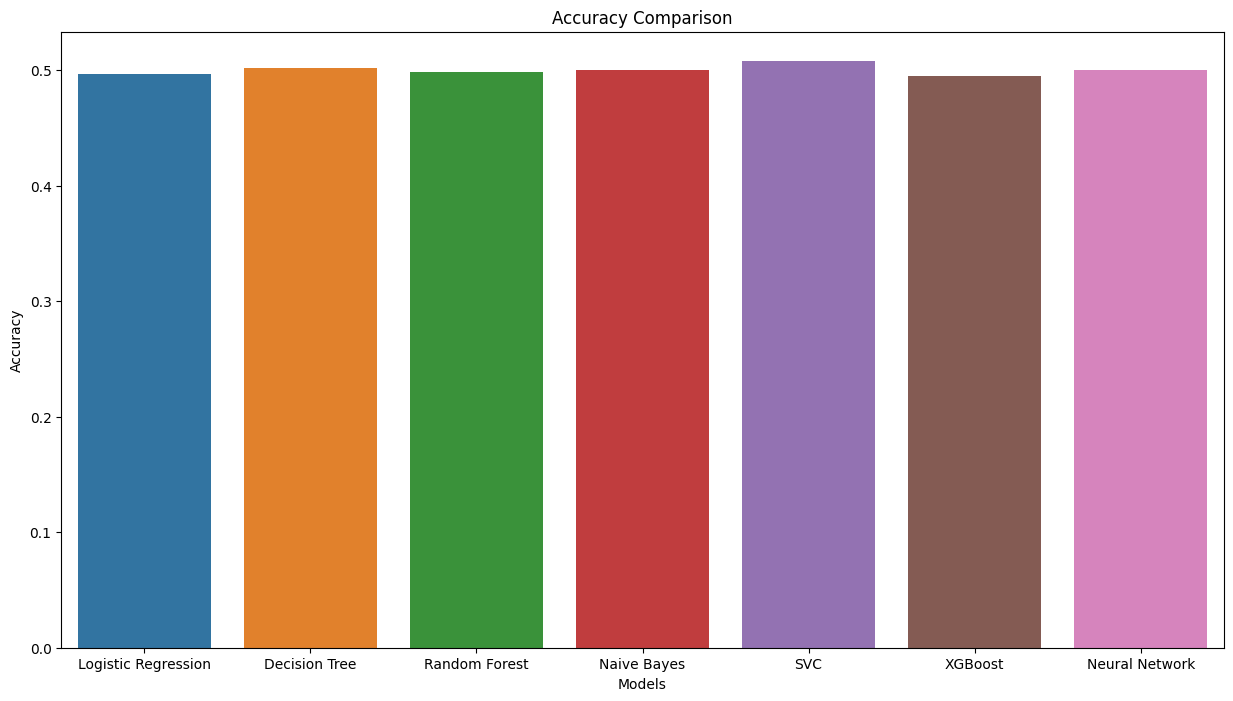

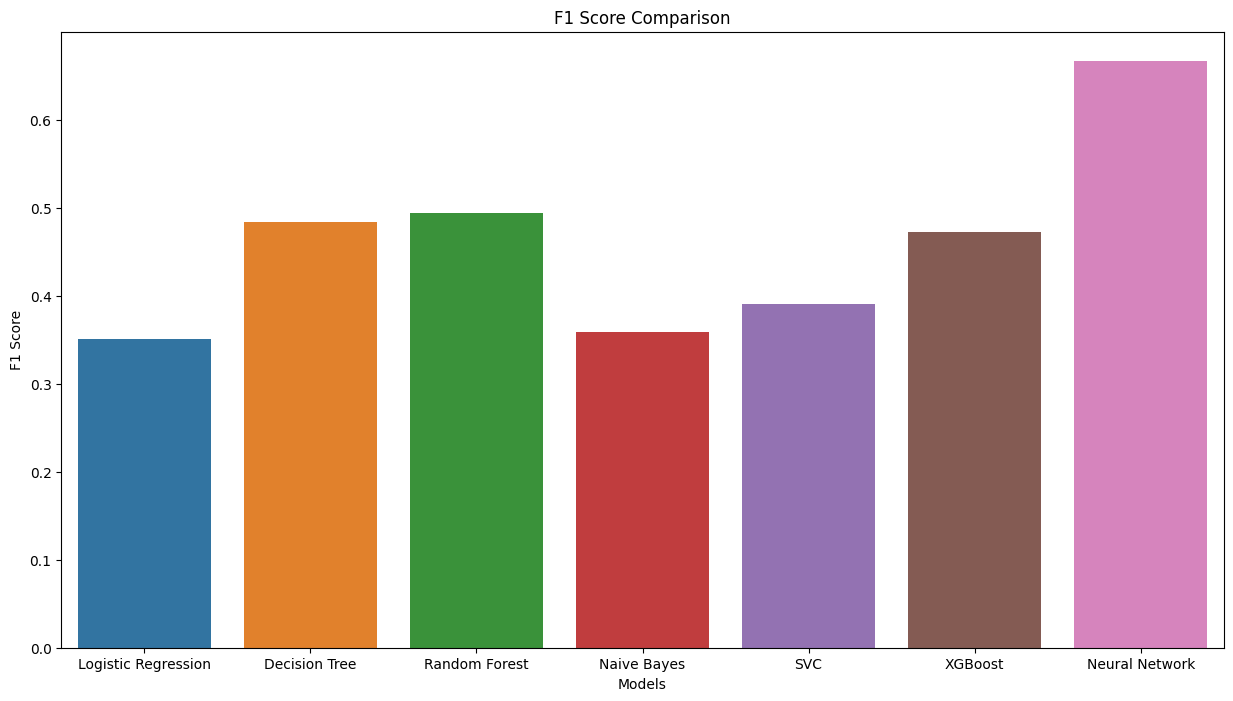

In [ ]:
# Comparison between models

models = ['Logistic Regression','Decision Tree', 'Random Forest', 'Naive Bayes', 'SVC', 'XGBoost', 'Neural Network']
acc = [lr_acc,dt_acc, rf_acc, nb_acc, svc_acc, xgb_acc, nn_acc]
f1 = [lr_f1, dt_f1, rf_f1, nb_f1, svc_f1, xgb_f1, nn_f1]

plt.figure(figsize=(15, 8))
sns.barplot(x=models, y=acc)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x=models, y=f1)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.show()

## 4. Model Optimization

In [ ]:
# Hyperparameter Tuning of Random Forest Classifier

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [300, 400, 500],
    'max_depth':[30, 35, 40]
}

rf = joblib.load('Random_Forest.pkl')

grid = GridSearchCV(rf, params, cv=2, verbose=5, n_jobs=-1)

grid.fit(train_X, train_y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(max_depth=30), n_jobs=-1,
             param_grid={'max_depth': [30, 35, 40],
                         'n_estimators': [300, 400, 500]},
             verbose=5)

In [ ]:
print(grid.best_params_)

{'max_depth': 40, 'n_estimators': 400}


In [ ]:
model = grid.best_estimator_

## 5. Model Deployment

In [ ]:
age = int(input("Enter Age: "))
age = (age - data['Age'].min()) / (data['Age'].max() - data['Age'].min())

gender = input("Enter Gender (Male (0)/ Female(1)): ")

location = input("Enter Location (Houston (0)/ Los Angeles (1)/ New York (2)/ chicago (3)/ Miami(4)): ")

Subscription_Length_Months = int(input("Enter Subscription Length Months: "))
Subscription_Length_Months = (Subscription_Length_Months - data['Subscription_Length_Months'].min()) / (data['Subscription_Length_Months'].max() - data['Subscription_Length_Months'].min())

Monthly_Bill = float(input("Enter Monthly Bill: "))
Monthly_Bill = (Monthly_Bill - data['Monthly_Bill'].min()) / (data['Monthly_Bill'].max() - data['Monthly_Bill'].min())

Total_Usage_GB = int(input("Enter Total Usage in GB: "))
Total_Usage_GB = (Total_Usage_GB - data['Total_Usage_GB'].min()) / (data['Total_Usage_GB'].max() - data['Total_Usage_GB'].min())


x = np.array([age, gender, location, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB])
prediction = model.predict([x])

print("Random Forest Prediction: ", prediction[0])

Random Forest Prediction:  0


c:\Users\ramch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
